# Visualizing Filters of a Convolutional Neural Network

## Importing the libraries

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from PIL import Image

## Loading the VGG16 model

In [2]:
model = tf.keras.applications.vgg16.VGG16(include_top=False, weights = 'imagenet', input_shape=(96,96,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

## Getting a called Layer's Output

In [3]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
      )
get_submodel('block3_conv2').summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)      

## Image Visualization

In [4]:
def create_image():
  return tf.random.uniform((96,96,3),minval=-0.5,maxval=0.5)

def plot_image(image,title='random'):
  image = image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

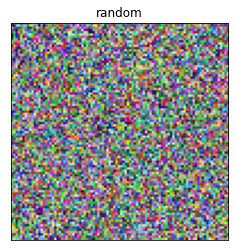

In [5]:
image = create_image()
plot_image(image)

## Training Loop

In [18]:
def visualize_filter(layer_name, image = None, f_index=None, iters=50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0,num_filters-1)
  assert num_filters > f_index,'f_index is out of bounds'

  if image is None:
    image = create_image()

  verbose_step = iters // 10

  for i in range(0,iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis=0))[:,:,:,f_index]
      loss = tf.math.reduce_mean(out)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image+=grads * 10

    if (i+1) % verbose_step == 0:
      print(f'Iteration: {i+1}, Loss: {loss.numpy():.4f}')

  plot_image(image, f'{layer_name}, filter index: {f_index}')

## Final Results

Iteration: 10, Loss: 48.4782
Iteration: 20, Loss: 89.9872
Iteration: 30, Loss: 133.8582
Iteration: 40, Loss: 184.5988
Iteration: 50, Loss: 242.3068
Iteration: 60, Loss: 305.7670
Iteration: 70, Loss: 373.3560
Iteration: 80, Loss: 443.7090
Iteration: 90, Loss: 515.6747
Iteration: 100, Loss: 588.8050


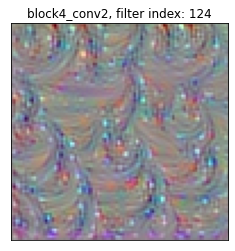

In [19]:
layer_name = 'block4_conv2' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name, f_index = 124, iters=100)

## Final Results with an input image

In [8]:
def my_image(imdir):
  my_img = Image.open(imdir)
  my_img = tf.keras.preprocessing.image.img_to_array(my_img)/255
  my_img = tf.convert_to_tensor(my_img)
  my_img = tf.image.resize(my_img, [96,96])
  print(my_img.shape)
  plt.imshow(my_img)
  return my_img

(96, 96, 3)


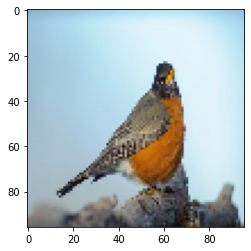

In [9]:
my_img = my_image("image/bird.jpg")

Iteration: 10, Loss: 5.6992
Iteration: 20, Loss: 10.0478
Iteration: 30, Loss: 14.7111
Iteration: 40, Loss: 19.6100
Iteration: 50, Loss: 24.6347
Iteration: 60, Loss: 29.7134
Iteration: 70, Loss: 34.8312
Iteration: 80, Loss: 39.9891
Iteration: 90, Loss: 45.1818
Iteration: 100, Loss: 50.4009


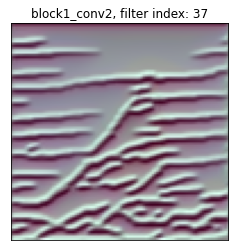

In [27]:
layer_name = 'block1_conv2' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name, my_img, f_index = None, iters=100)